### Note: 
The project description file states that the test data includes four Corgie model vehicles a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. But the column - Class has only 3 attributes - bus, car and van. It doesn't flag Saab 9000 and Opel Manta 400 cars separately. Accordingly, the test is being performed to classify the vehicles into 3 catergories only - bus, car and van.

### Basis of choosing SVC models
The problem statment suggests the use of grid search for recommended C values of 0.01, 0.05, 0.5 and 1. However, I have created a for loop from the range of 1 to 20 to determine the best c value. Also the problem statement suggest the use of kernel - linear and rbf. From the multiple scatter plots presented in the pair plot I don't notice any linearly separable data point and consider that rbf would be the best hyper parameter to build the classification model.

### Steps taken:
Based on the exploratory data analytics performed I noticed a few missing data points and outliers in various columns. 
##### Treating categorical variables -
The column class has been encoded to numerical values using label encoder.
##### Missing data points - 
I substituted the missing data points using the median value for the respective column. 
##### Outliers - 
As support vector machines are being used as the classification model its very important to treat outliers in the data. However, considering that we are using PCA to extract features out of the attributes and PCA in itself reduces noise in the data no further steps are taken to treat the outliers. 
##### Dimensionality reduction -
As can be seen from the pair plots presented below, there are many variables that are highlighly correlated. To go about manually eliminating dimensions I would have go about iterating with eliminating one of the variables with high correlation amoung each other one after the other, compared the test results (accuracy scores) and decided on which variables to keep as final input variables and which to eliminate. But that would involve loss of information as I would be eliminating whole columns all together. Instead by using PCA I am creating new features that are derived from all the columns of the original data. This way I ensure that I have not lost any important piece of data and also succeeded in reducing the dimensions in a more scientific manner.

### Conclusion
The model built using scaled data retaining all the dimensions gives an accuracy score of 98.8% where as the model built using 8 dimensions derived using principal component analysis gives an accuracy score of 96.5%. Reducing the number of dimensions by 10 resulted in a loss in accuracy of only 2.3%. Also considering that there were outliers in the original data set and PCA reduces the impact of noise on the data set the model built using PCA inputs is more likely to perform well in business use cases than the model built using the original data.

In [42]:
# importing pandas and numpy to import the data set and work on data frames and arrays
import pandas as pd
import numpy as np

# importing matplotlib plotting libraries
import matplotlib.pyplot as plt

# to enable plotting graphs in jupyter notebooks
%matplotlib inline

# importing seaborn for statistical plots
import seaborn as sns

# importing sklearn package's data splitting function to split the data into training and testing set
from sklearn.model_selection import train_test_split

# importing metrics to calculate the accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer  

# importing support vector machine from sklearn
from sklearn.svm import SVC

# importing label encoder from sklearn
from sklearn.preprocessing import LabelEncoder

# importing zscore convertor from scipy
from scipy.stats import zscore

# importing principal component analysis module from sklearn
from sklearn.decomposition import PCA

In [43]:
# importing the dataset as a dataframe using pandas
vehicle_data = pd.read_csv('vehicle-2.csv')
vehicle_data.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [44]:
#Checking for empty cells in the data
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

We notice empty rows in most of the columns. (all line items where the non - null value is less than 846). Refer below for how the empty values are being treated

In [45]:
# Encoding the target value - class to numerical values from text values
le = LabelEncoder()
vehicle_data['Class_encoded'] = le.fit_transform(vehicle_data['class'])
vehicle_data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class,Class_encoded
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus,0


In [46]:
# Filling empty cells with the median of the column
test_data = vehicle_data.copy()
test_data.drop(['class'], axis = 1, inplace = True)
missing_value_filler = lambda x: x.fillna(x.median())
test_data = test_data.apply(missing_value_filler,axis=0)
test_data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
Class_encoded                  0
dtype: int64

In [47]:
# Plotting the 5 point summary for the datafram
test_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


Most of the data points have a normal distribution. However, we notice long tails (right skewed data) which indicate the presence of outliers. Refer below for pair plots and box plots plotted to better visualize and understand the data distribution

C:\Users\Jarvis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Jarvis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Jarvis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Jarvis\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


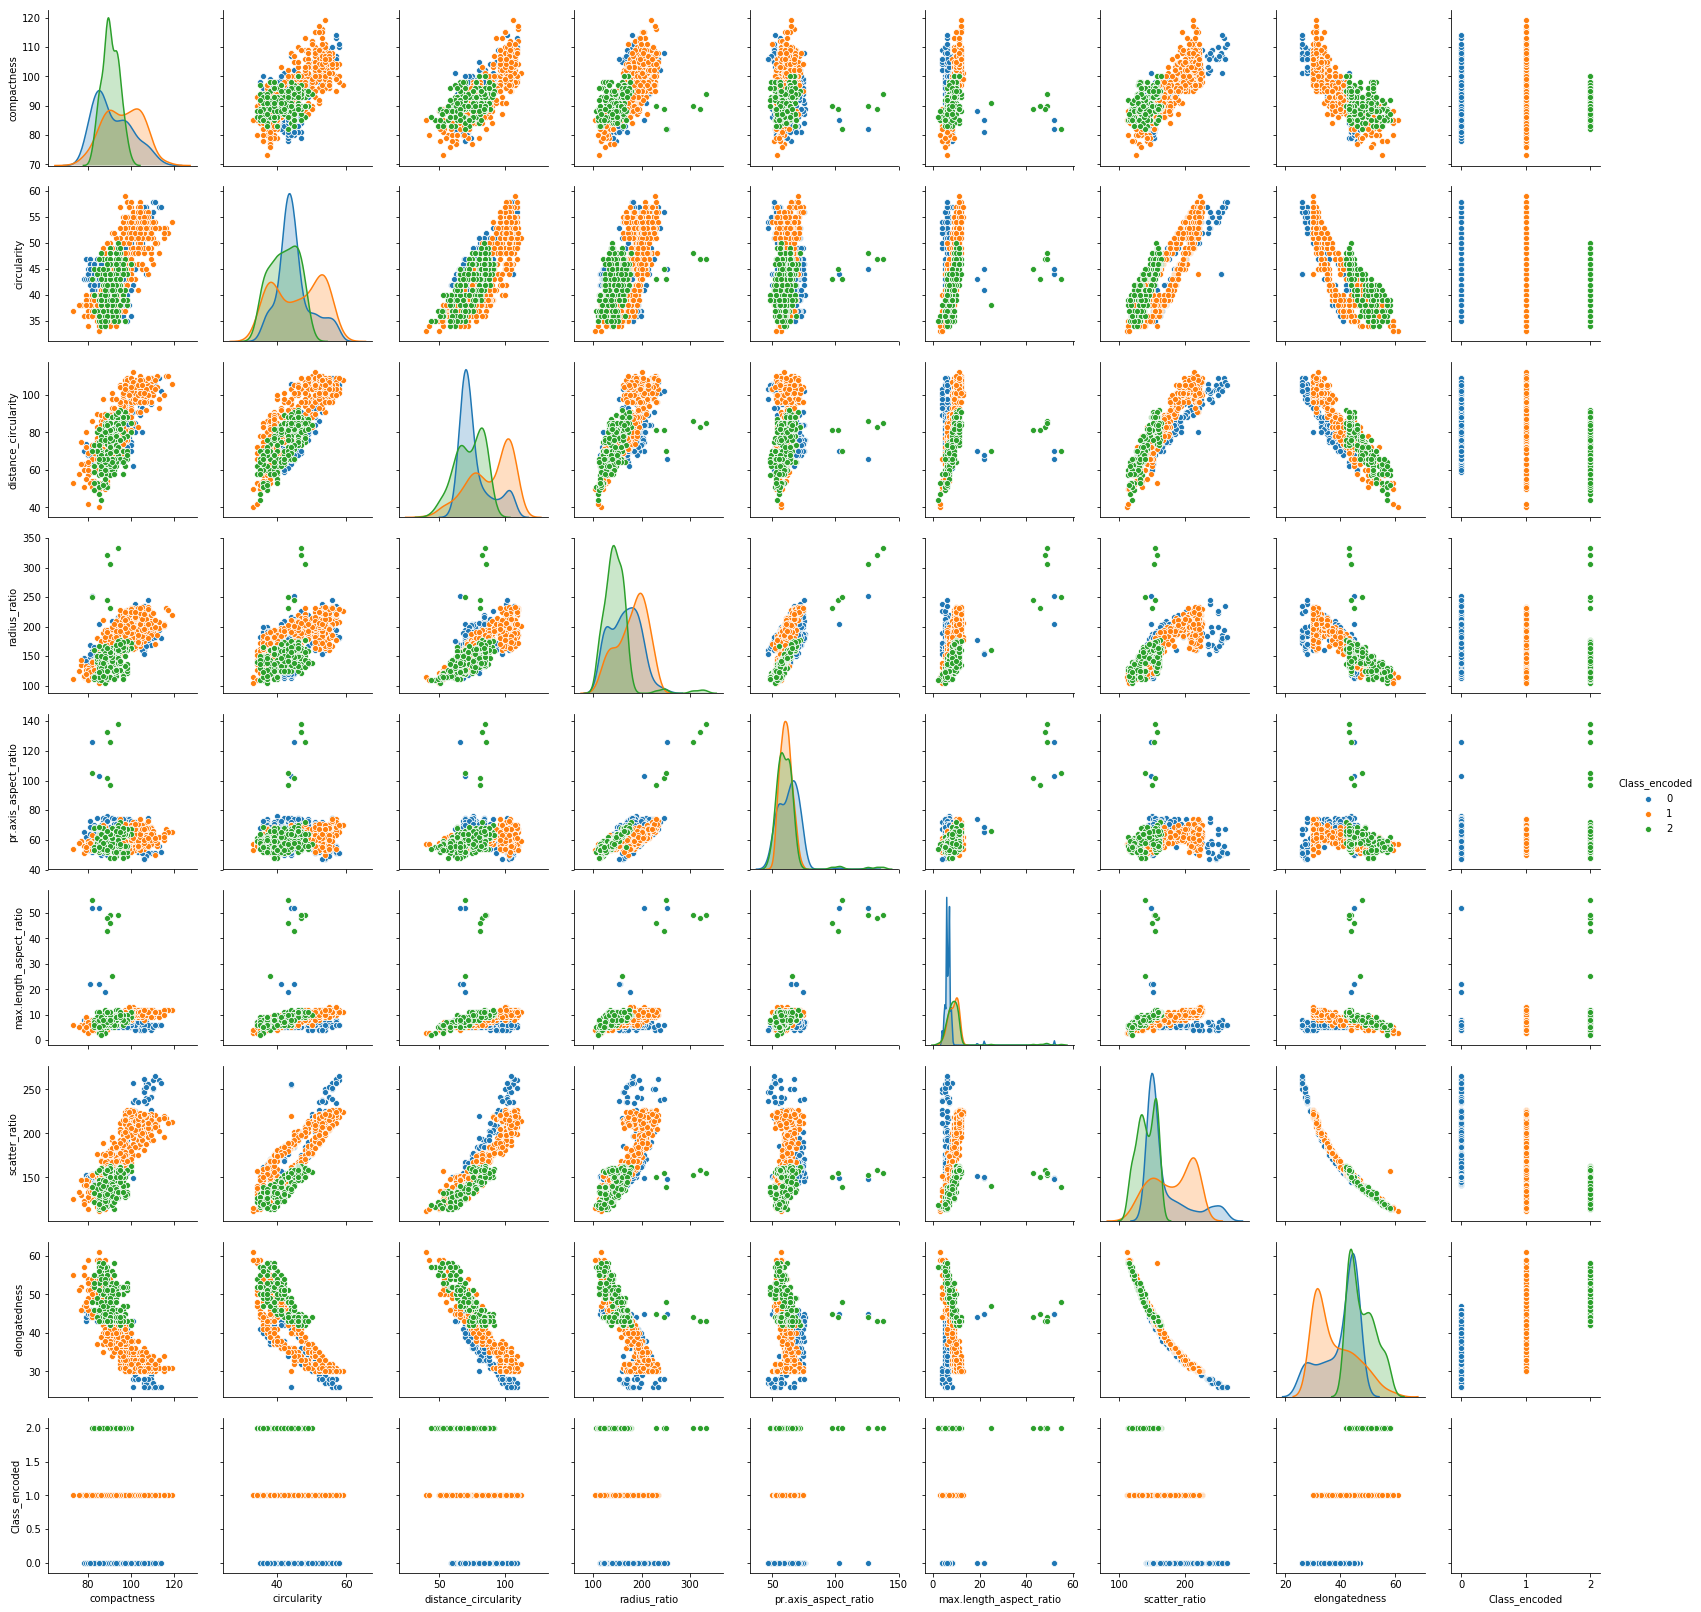

In [48]:
# Plotting pair plot to study the data distribution and correlation

# splitting the data aide better presentation of the data

# Pairplot1
pairplot1 = test_data.iloc[:,0:8]
pairplot1['Class_encoded'] = test_data['Class_encoded']
sns.pairplot(pairplot1, hue = 'Class_encoded')


1. As can be seen from the pair plot above all the attributes except for pr.axis_aspect_ratio and max.length_aspect_ratio have a positive correlation with the other attributes.
2. Also from the kde plot in the diagonal its suggestive that there are multiple gaussians in the data set.
3. radius_ratio, pr.axis_ratio and max_length_aspect_ratio have outliers in the dataset.

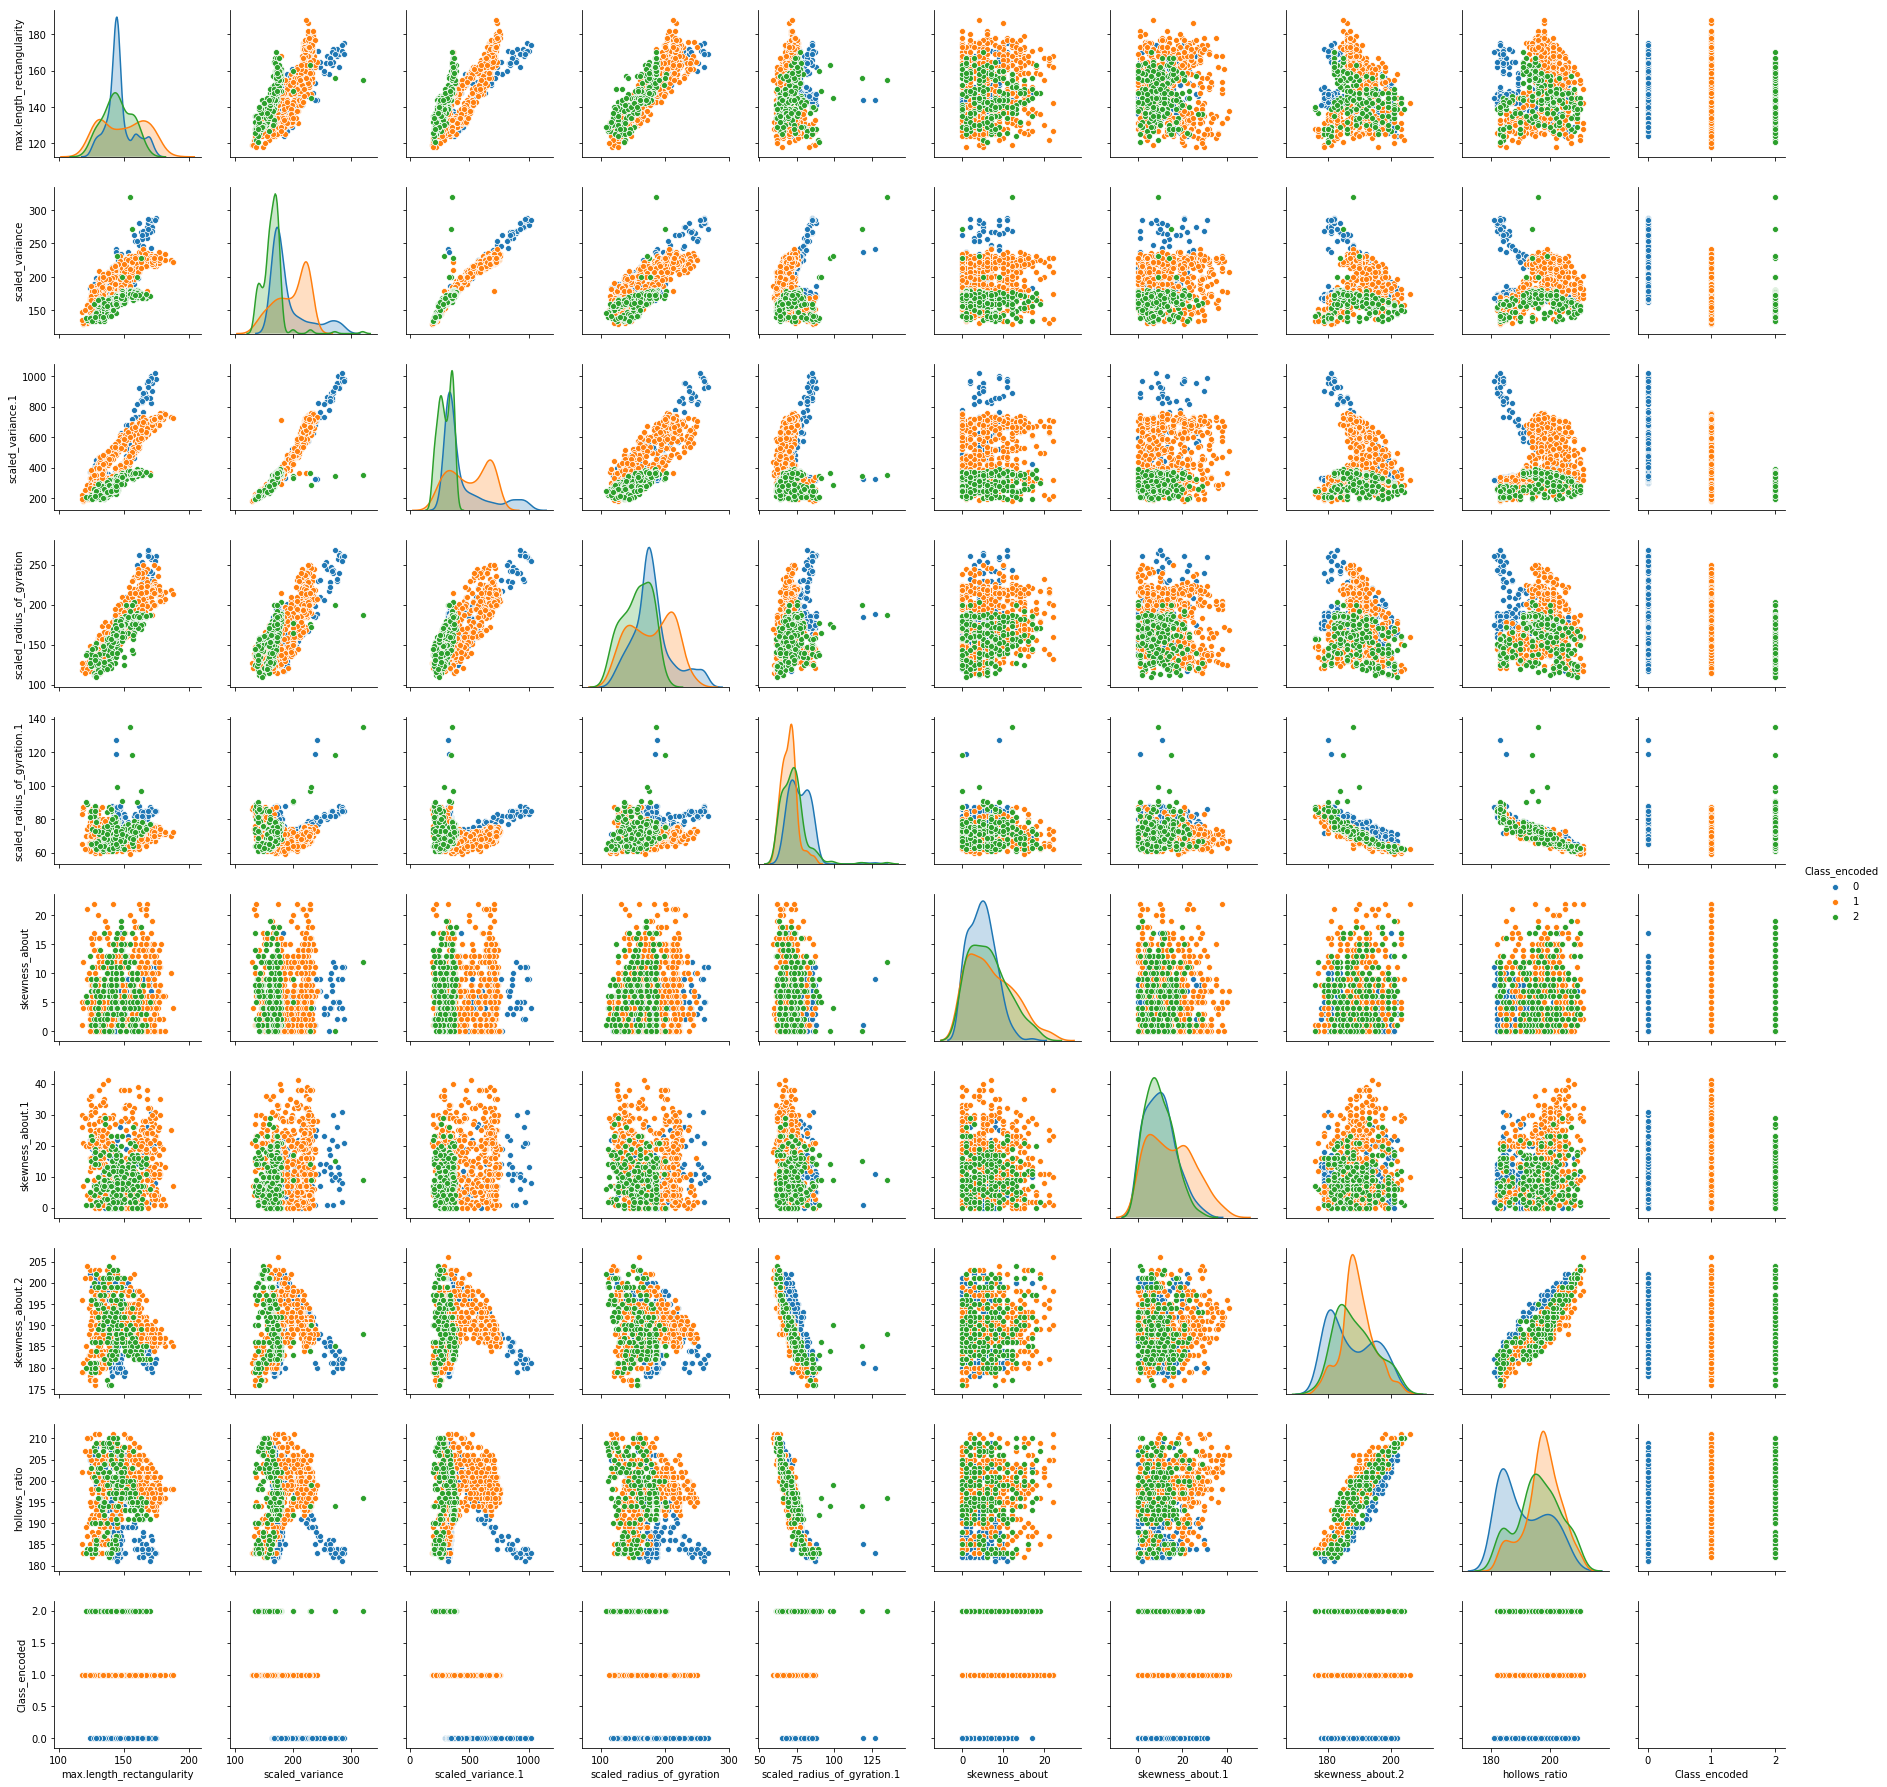

In [49]:
# Pairplot2
pairplot2 = test_data.iloc[:, 9:]
sns.pairplot(pairplot2, hue = "Class_encoded")

1. As can be seen from the pair plot above all the attributes except for skewness_about, skewness_about_1, skewness_about_2 and hollows_ratio are correlated with the other attributes.
2. Also from the kde plot in the diagonal its suggestive that there are multiple gaussians in the data set.
3. scaled_variance, scaled_variance.1, scaled_radius_of_gyration, skewness_about and skewness_about.1 has outliers in the dataset.

### Dimensionality reduction
As can be seen from the pair plots presented below, there are many variables that are highlighly correlated. To go about manually eliminating dimensions I would have go about iterating with eliminating one of the variables with high correlation amoung each other one after the other, compared the test results (accuracy scores) and decided on which variables to keep as final input variables and which to eliminate. But that would involve loss of information as I would be eliminating whole columns all together. Instead by using PCA I am creating new features that are derived from all the columns of the original data. This way I ensure that I have not lost any important piece of data and also succeeded in reducing the dimensions in a more scientific manner.

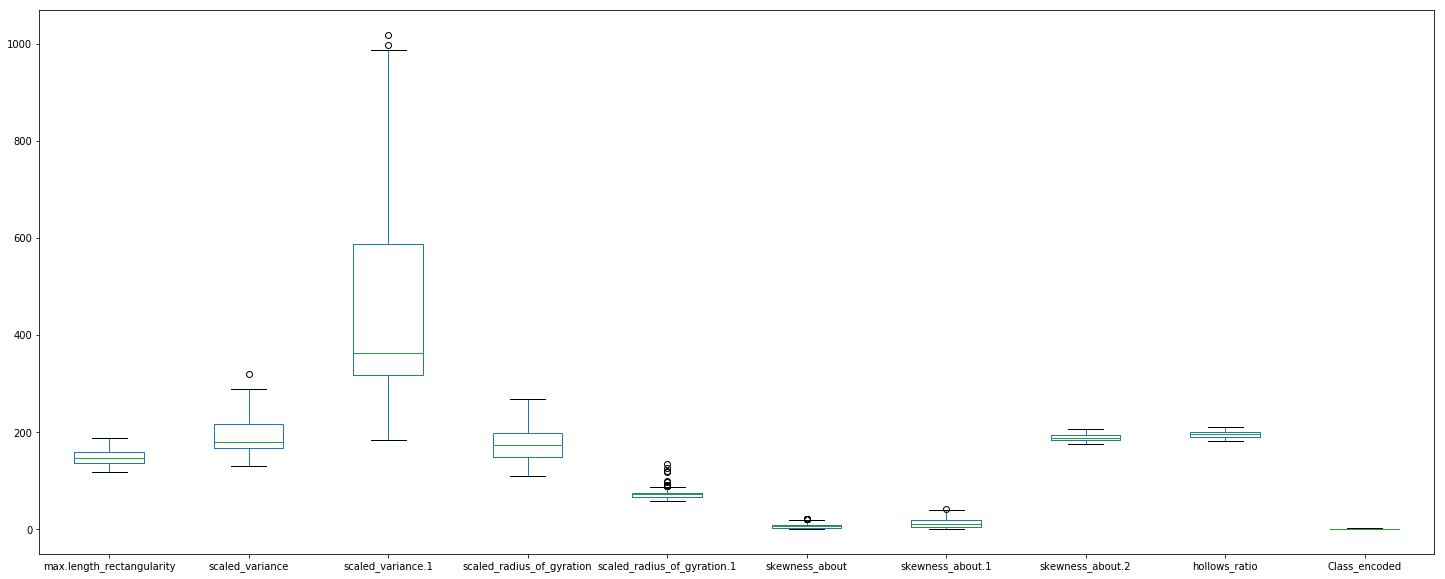

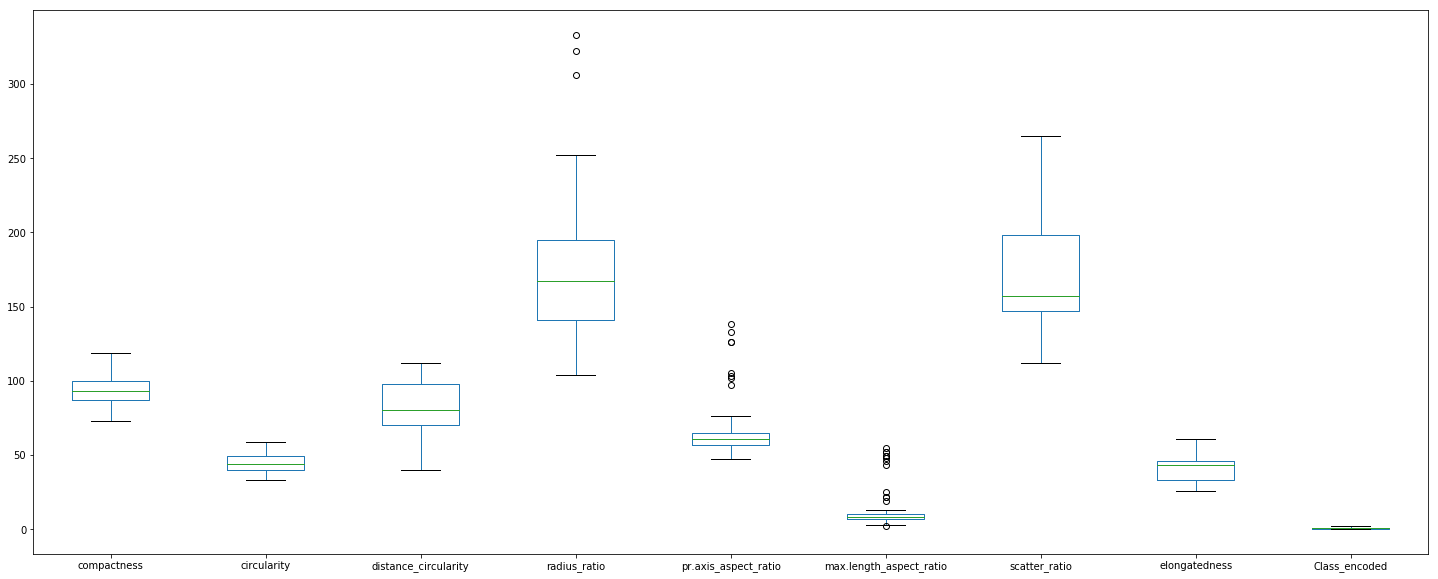

In [50]:
# Using Box plots to visualise the outliers in a better manner

pairplot2.plot(kind = 'box', figsize = (25,10))
pairplot1.plot(kind = 'box', figsize = (25,10))

As we are about to use support vector machines as a classification model its very important to treat outliers in the data. Find below the box plots to visualize the outliers better and for the steps taken to eliminate the outliers. However, considering that we are using PCA to extract features out of the attributes and PCA in itself reduces noise in the data no further steps are taken to treat the outliers

In [51]:
# Taking stock of the spread of the sample population across the class to be classified
test_data['Class_encoded'].value_counts()

1    429
0    218
2    199
Name: Class_encoded, dtype: int64

As can be seen from the data count by class presented above, the samples for each class of vehicles is not equally distributed. Accordingly, the models ability to classify the classes - buses and van will be relatively low as compared to the models classifying abilities to correctly classify cars. However, considering the silouettes of a bus and a van are very distinct the lack of adequate number of samples should not greatly affect the models classifying ability.

In [52]:
# splitting the data into dependent and independent variables
X = test_data.iloc[:, 0:18]
y = test_data['Class_encoded']

In [53]:
# Scaling the input variables
XScaled=X.apply(zscore)
XScaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.273363,1.310398,0.311542,-0.207598,0.136262,-0.224342,0.758332,-0.401920,-0.341934,0.285705,-0.327326,-0.073812,0.380870,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.835032,-0.593753,0.094079,-0.599423,0.520519,-0.610886,-0.344578,-0.593357,-0.619724,-0.513630,-0.059384,0.538390,0.156798,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.202018,0.548738,0.311542,1.148719,-1.144597,0.935290,0.689401,1.097671,1.109379,1.392477,0.074587,1.558727,-0.403383,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.295813,0.167907,0.094079,-0.750125,0.648605,-0.610886,-0.344578,-0.912419,-0.738777,-1.466683,-1.265121,-0.073812,-0.291347,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.082192,5.245643,9.444962,-0.599423,0.520519,-0.610886,-0.275646,1.671982,-0.648070,0.408680,7.309005,0.538390,-0.179311,-1.450481,-1.699181


In [54]:
# Presenting the covariance matrix
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

In [55]:
# Performing PCA to extract 18 dimensions out of the 18 input variables
pca = PCA(n_components=18)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [56]:
# Presenting the derived eigen values and vectors and the corresponding variation explained by them
print('Eigen Values')
print(pca.explained_variance_)
print('% of variation explained by each eigen value')
print(pca.explained_variance_ratio_)
print('Eigen vectors')
print(pca.components_)

Eigen Values
[9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.74120657e-02 2.05792871e-02 1.79166314e-02
 1.00257898e-02 2.96445743e-03]
% of variation explained by each eigen value
[5.21860337e-01 1.67297684e-01 1.05626388e-01 6.54745969e-02
 5.08986889e-02 2.99641300e-02 1.99136623e-02 1.23150069e-02
 8.91215289e-03 5.09714695e-03 3.69004485e-03 2.58586200e-03
 1.98624491e-03 1.52109243e-03 1.14194232e-03 9.94191854e-04
 5.56329946e-04 1.64497408e-04]
Eigen vectors
[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.221748

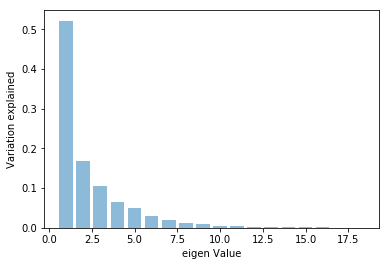

In [57]:
# Presenting a bar plot for the variabtion explained by each eigen value
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

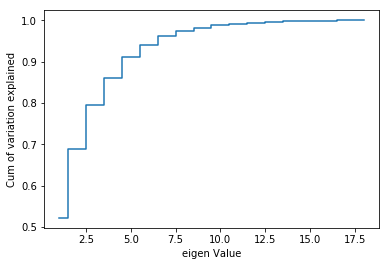

In [58]:
# Presenting an elbow plot for the variabtion explained by each eigen value
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

As can be seen from the elbow plot 8 variables explain c.97% of the variation. I would go about creating input features using PCA with 8 input variables

## Dimensionality reduction

Creating data sets 8 dimensions explaining c.97% variation respectively

In [59]:
pca8 = PCA(n_components=8)
pca8.fit(XScaled)
print(pca8.components_)
print(pca8.explained_variance_ratio_)
Xpca8 = pca8.transform(XScaled)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

C:\Users\Jarvis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


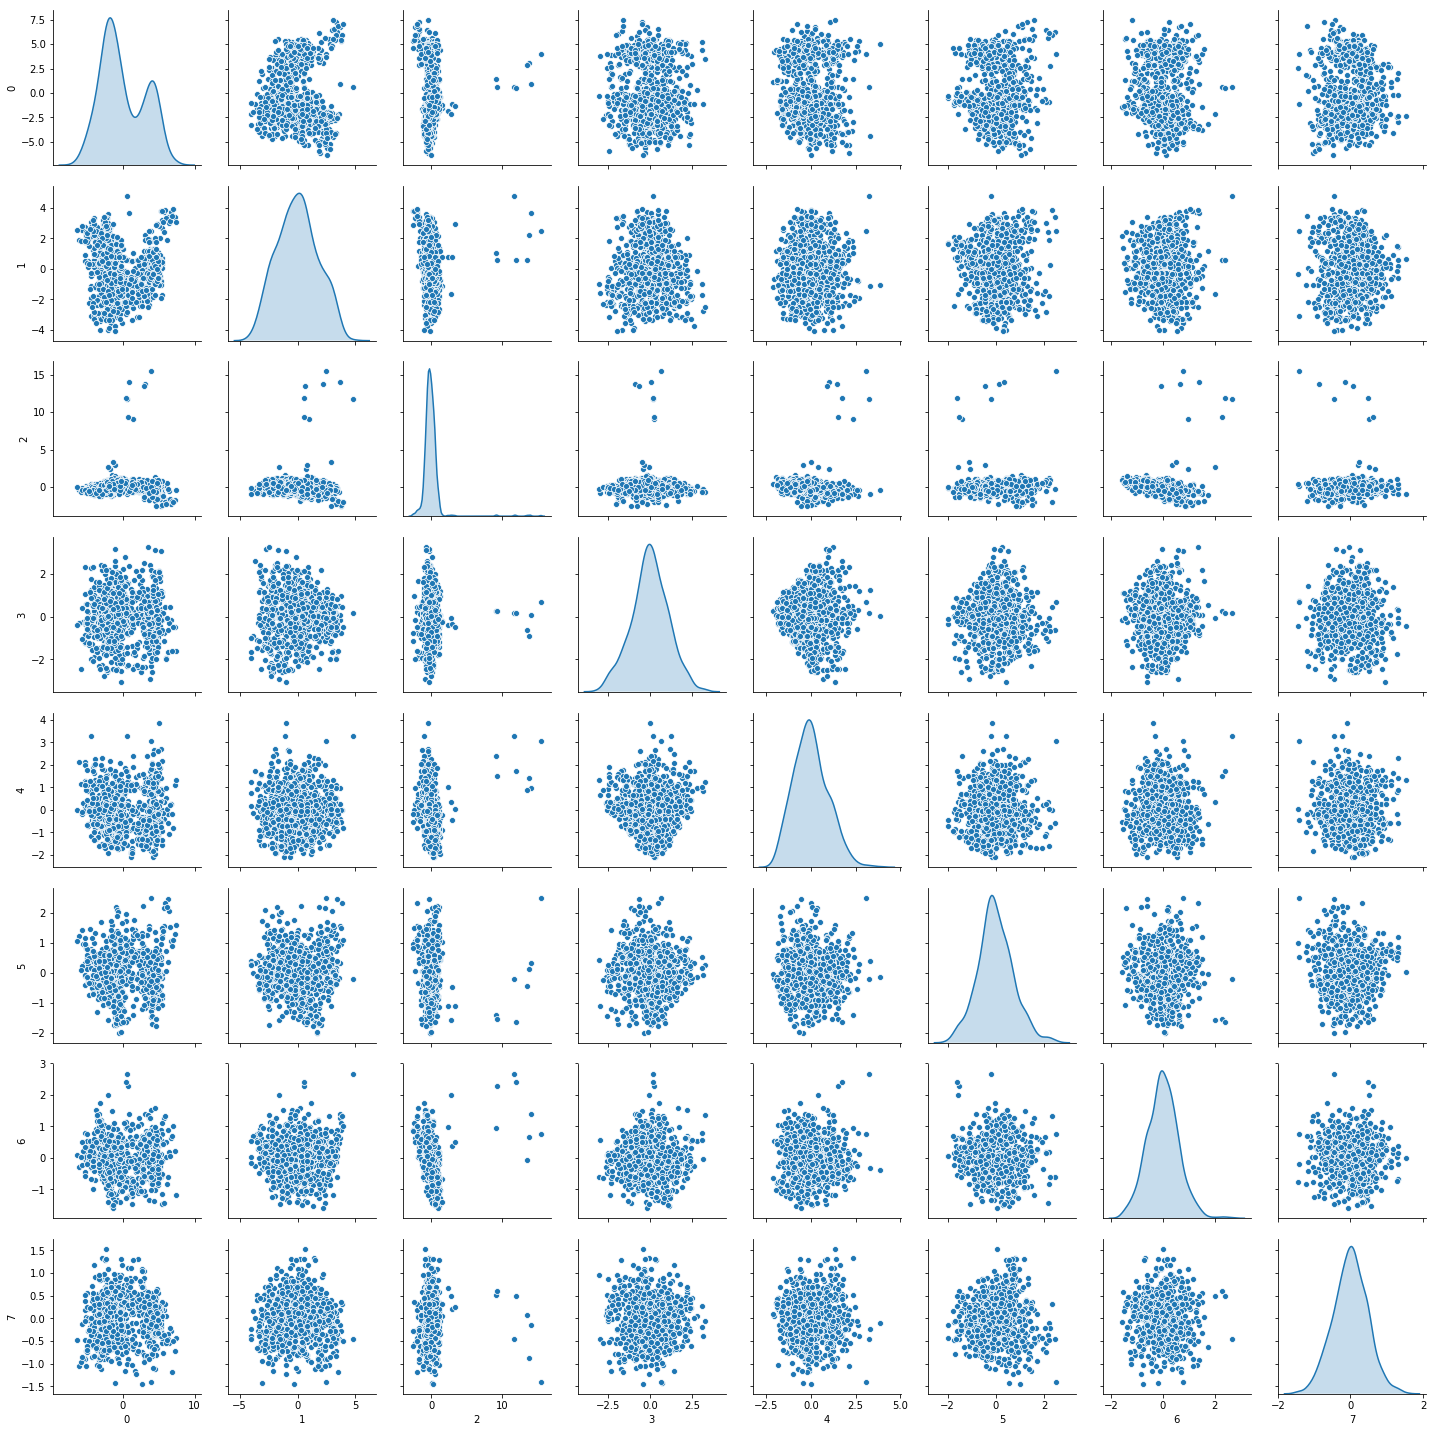

In [60]:
# presenting a pair plot to visualize the distribution and correlation among the data points
sns.pairplot(pd.DataFrame(Xpca8), diag_kind = 'kde')

From the above pair plot it can be seen that none of the attributes exhibit high correlation with each other

### Building SVC classification models using the 2 datasets 

Model 1: Building a SVC model using all 18 input variables. The input variables are scaled using zscores to be used in the classification model

In [61]:
# splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size = 0.3, random_state = 6)

In [62]:
# iterating for various combinations of c-value for the svc models
c_value = list(range(1,20))

ac_scores = []

for c in c_value:
    svc_model = SVC(kernel='rbf', C = c)
    svc_model.fit(X_train, y_train)
    y_pred_svc = svc_model.predict(X_test)
    scores = accuracy_score(y_test, y_pred_svc)
    ac_scores.append(scores)
    
optimal_c = c_value[ac_scores.index(max(ac_scores))]
print("The optimal c_value is %d" % optimal_c)

C:\Users\Jarvis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Jarvis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Jarvis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Jarvis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

The optimal c_value is 14


C:\Users\Jarvis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Jarvis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Jarvis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Jarvis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

In [63]:
# Building a Support Vector Machine on train data with rbf kernel and C value 14
svc_model = SVC(kernel='rbf', C = 14)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred_svc))

0.9881889763779528


C:\Users\Jarvis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Model 2: Building a SVC model using the 8 inputs derived by performing PCA

In [64]:
# splitting the data into training and testing set
X_train_pca8, X_test_pca8, y_train, y_test = train_test_split(Xpca8, y, test_size = 0.3, random_state = 6)

In [65]:
# iterating for various combinations of c-value for the svc models
c_value = list(range(1,20))

ac_scores = []

for c in c_value:
    svc_model = SVC(kernel='rbf', C = c)
    svc_model.fit(X_train_pca8, y_train)
    y_pred_svc_pca8 = svc_model.predict(X_test_pca8)
    scores = accuracy_score(y_test, y_pred_svc_pca8)
    ac_scores.append(scores)
    
optimal_c = c_value[ac_scores.index(max(ac_scores))]
print("The optimal c_value is %d" % optimal_c)

C:\Users\Jarvis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Jarvis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Jarvis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Jarvis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

The optimal c_value is 13


C:\Users\Jarvis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Jarvis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Jarvis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Jarvis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

In [66]:
# Building a Support Vector Machine on train data with rbf kernel
svc_model = SVC(kernel='rbf', C = 13)
svc_model.fit(X_train_pca8, y_train)
y_pred_svc_pca8 = svc_model.predict(X_test_pca8)
# evaluate accuracy
print(accuracy_score(y_test, y_pred_svc_pca8))

0.9645669291338582


C:\Users\Jarvis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Conclusion

The model built using scaled data retaining all the dimensions gives an accuracy score of 98.8% where as the model built using 8 dimensions derived using principal component analysis gives an accuracy score of 96.5%. Reducing the number of dimensions by 10 resulted in a loss in accuracy of only 2.3%. Also considering that there were outliers in the original data set and PCA reduces the impact of noise on the data set the model built using PCA inputs is more likely to perform well in business use cases than the model built using the original data.